<a href="https://colab.research.google.com/github/prasannashrestha011/ML_exercises/blob/main/titanic_survival_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
yasserh_titanic_dataset_path = kagglehub.dataset_download('yasserh/titanic-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'titanic-dataset' dataset.
Data source import complete.


In [26]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [3]:
df=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
y=df["Survived"]
X=df.drop("Survived",axis=1)

cat_features=["Pclass","Sex","Embarked"]
num_features=["Age","SibSp","Parch","Fare"]

cat_pipeline=Pipeline([
    ("cat",SimpleImputer(strategy="most_frequent")),
    ("encoder",OneHotEncoder(drop="first",sparse_output=False))
])

num_pipeline=Pipeline([
    ("num",SimpleImputer(strategy="median"))
])

preprocessor=ColumnTransformer(transformers=[
    ("cat",cat_pipeline,cat_features),
    ("num",num_pipeline,num_features)
])

X_encoded=preprocessor.fit_transform(X)


<Axes: xlabel='Survived', ylabel='Age'>

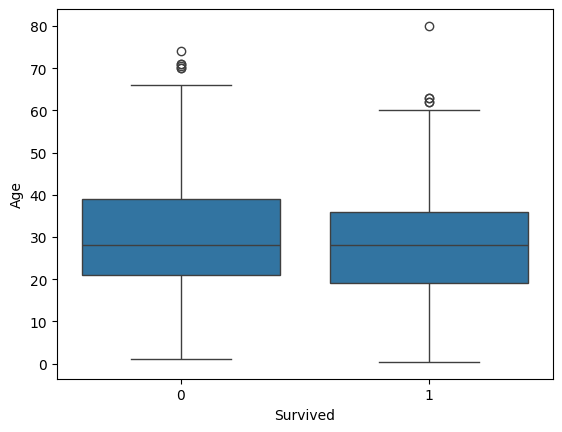

In [27]:
sns.boxplot(x=y,y=df['Age'])

# Unsurvived class #
>The maximum age of people who didnt survived was around 65 years, while the minimum age was around 8 years.

>The top 25% age group were older than 40 years,while bottom 25% of people were aged from 5 to 22.

>Half of passangers were younger than 28 years, while other half were older than 28 years

#Survived class
> The maximum survived age was around 60 years, while minimum age was around 8 years.

>The top 25% of age group were more than 38, while the bottom age group were lesser than 20.

>Similarly,Half of passengers who survived were also younger than 28 , while other half were older than 28 years.




In [18]:
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,test_size=0.2,random_state=42)

In [19]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [24]:
y_pred=model.predict(X_test)

print("Accuracy score: ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score:  0.7988826815642458
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

